# Visualizations - requirements by demo and analog

### DEA Plotting Testing - January 25, 2019


# Concept

## 0. Define a science visualization problem (SCIENCE)

## 1. Choose a data store or data lake (STORAGE)

## 2. Choose a compute platform (COMPUTE)

## 3. Load SOFTWARE: Tony's little-cloud/odc-lite - modeled after the ODC and PANGEO reference architecture

## 4. Visualize your time series data


> Hey You Get Off My Cloud



# Refine the Visualization Dataset

1. select an AOI Area of Interest
2. Filter by criteria
3. Extract only the "pretty scenes" - manually or by machine learning
    - prune, select, repeat
4. visualize, visualize, visualize
    - rasters, vectors, overlays, indexes - NDVI, NDWI - 
    - heatmaps
    - pixel quality
    - pyccd and wofs models
    - raster products
    - side by side
    - juxtapose
    - ANIMATIONS


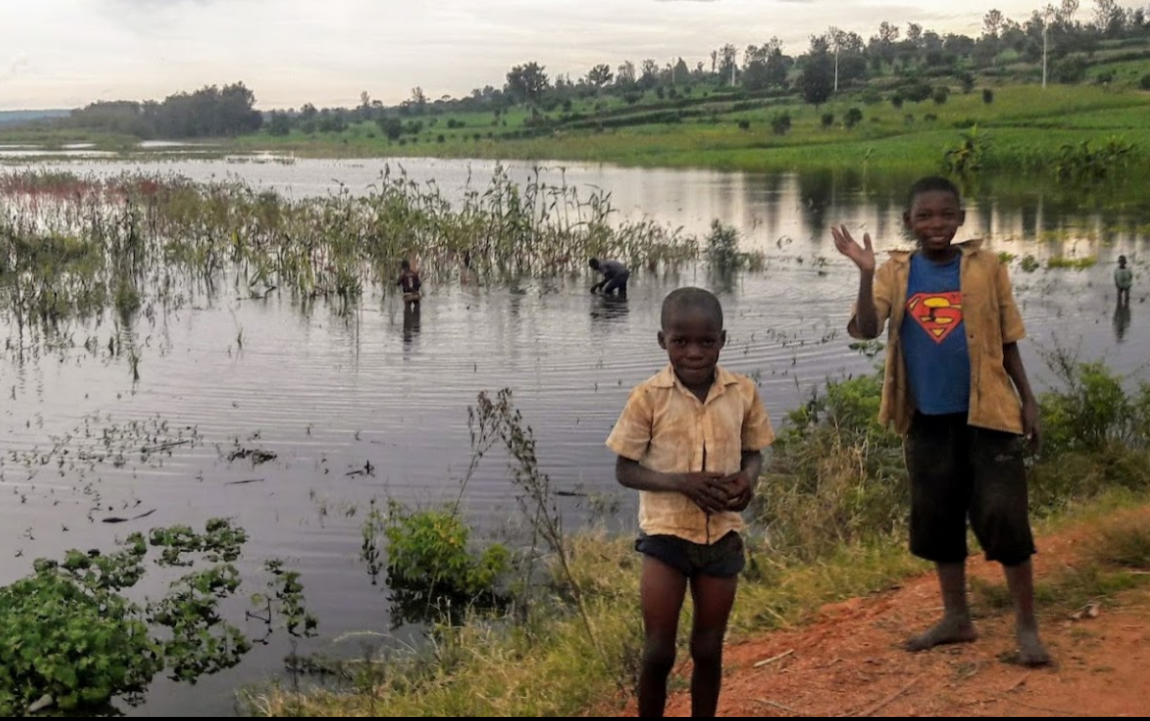

In [1]:
from IPython.display import Image
Image(filename=('assets/lake_rumira.png'))  


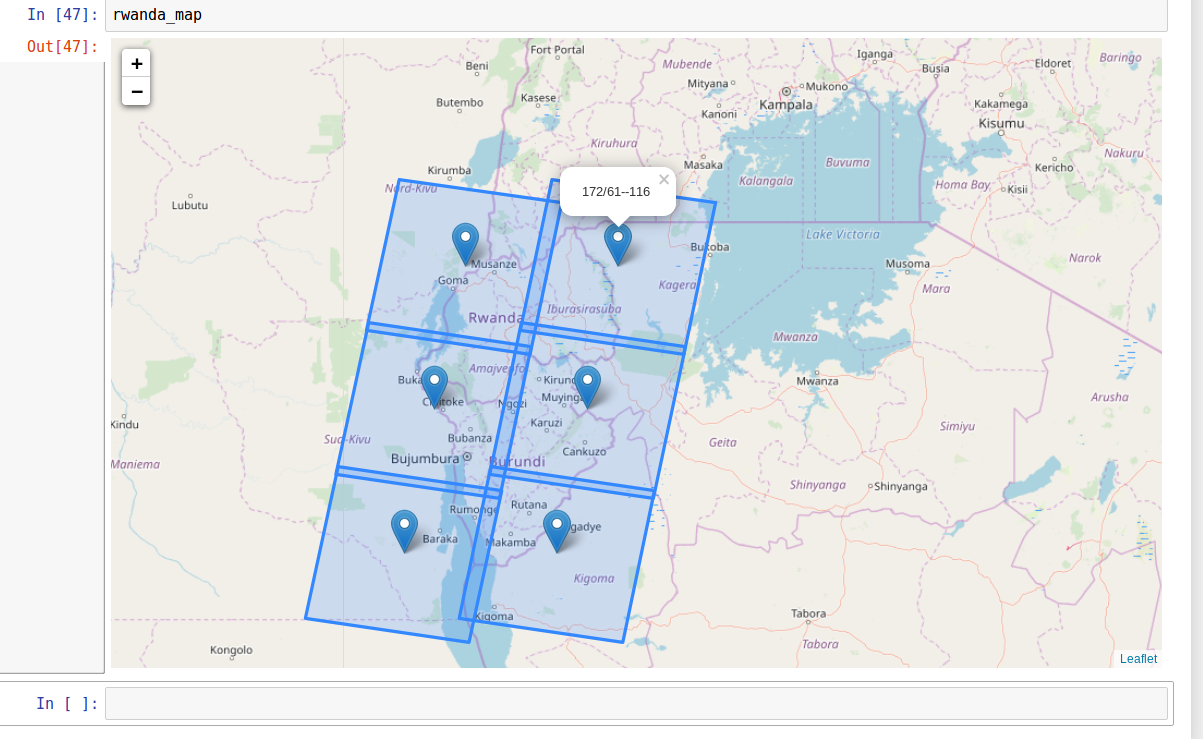

In [2]:
Image(filename=('assets/rwanda_map.png'))  


![pangeo](https://pangeo.io/_images/pangeo_tech_1.png)

![odc overview](https://cdn-images-1.medium.com/max/1200/1*2XgL8GGYEvDcOpiqZaWJ7Q.png)

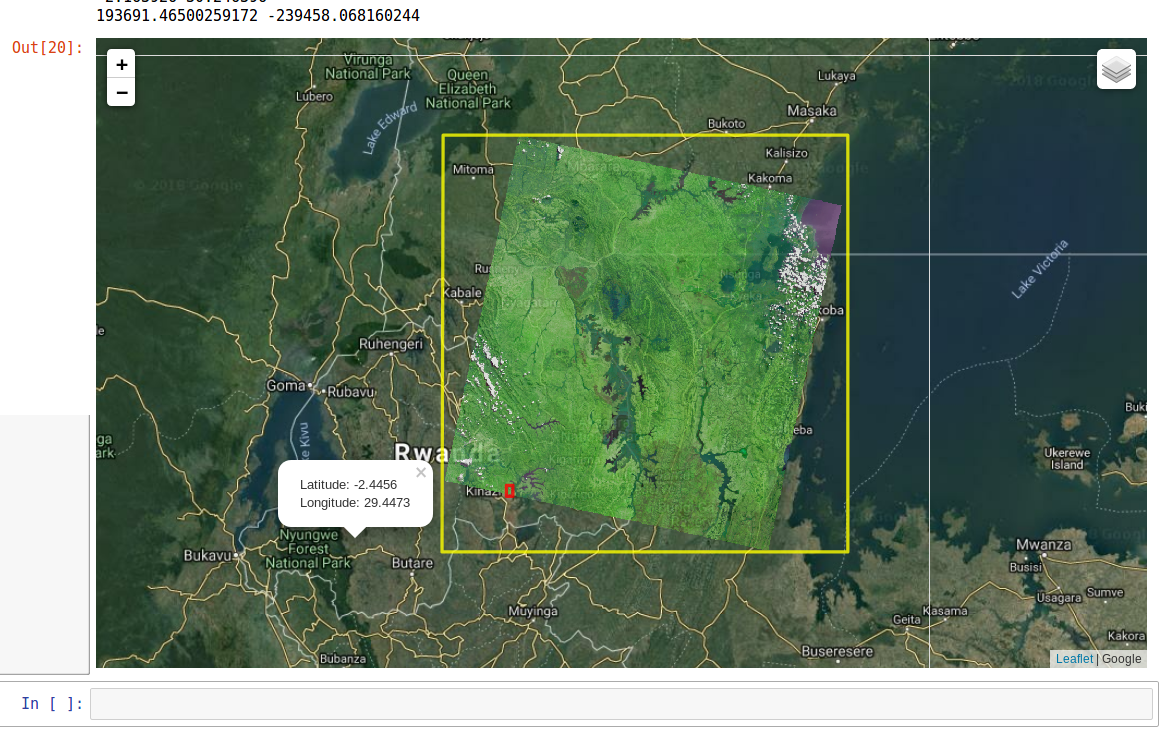

In [3]:
Image(filename=('assets/rumira_aoi.png'))  


In [4]:
from notebookLib.nb_DEAPlotting import nb_rgb

In [5]:
import datetime
#import numpy
#import xarray
#import rasterio
from lilcubeLib.lc_api import Lilcube
#from noteLib import ge_translate

SyntaxError: invalid syntax (lc_api.py, line 38)

In [ ]:
from lilcubeLib.lc_xarray import AOI_bounding_box, Xpart
from lilcubeLib.lc_xarray import build_the_xarray

In [ ]:
aoi = AOI_bounding_box((30.209661,-2.218817,30.246396,-2.163926)) #bounding box for lake rumira

In [ ]:
date_range = (datetime.datetime(2013,2,1), datetime.datetime(2015,7,31))
# date_range = (datetime(2013,7,6), datetime(2018,7,7))

es_index = 'datacube'
es_type = 'rwanda'

lc = Lilcube()

measurements = ('red','green','blue',)

# return a pandas data frame product id creation date and red
panda_df = lc.search(es_index, es_type, (aoi.ul_lat, aoi.ul_lon), (aoi.lr_lat, aoi.lr_lon),
             time = date_range, measurements = measurements )

In [ ]:
panda_df

In [ ]:
len(panda_df)

In [ ]:
df2 = panda_df.loc[panda_df['path']=='172']

#df.loc[df['column_name'] == some_value]

#df2

In [ ]:
len(df2)

## ds = build_the_xarray(aoi.geobox, measurements, df2)

In [ ]:
%%time
#ds = build_the_xarray(aoi.geobox, measurements, panda_df)
ds = build_the_xarray(aoi.geobox, measurements, df2)



In [ ]:
ds
ds2 = ds
#ds2 = ds.sel(datePR=slice('2013-07-06_172_61', '2013-07-06_172_62'))

#ds.sel(datePR=slice('2013-07-06_172_61', '2013-07-06_172_62')).plot.imshow('x', 'y', col='time', col_wrap=4)

In [ ]:
ds2

In [ ]:
# dir(ds2)

In [ ]:
display_color='red'
# ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='tab20')

https://matplotlib.org/examples/color/colormaps_reference.html

In [ ]:
!date

In [ ]:
display_color='red'
# ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='flag')
ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='prism')

In [ ]:
# help(nb_rgb)

In [ ]:
nb_rgb(ds2,bands = ['red', 'green', 'blue'], index = [0,1,6,7,8,11,13,14,15,16,20,21], index_dim='datePR',  
       percentile_stretch=(.2,.85), aspect=1.2)


In [ ]:
nb_rgb(ds2,bands = ['red', 'green', 'blue'], index = [0,1,6,7,8,11,13,14,15,16,20,21], index_dim='datePR',  
       percentile_stretch=(.5,.85), aspect=1.2)


In [ ]:
nb_rgb(ds2,bands = ['red', 'green', 'blue'], index = [0,1,6,7,8,11,13,14,15,16,20,21], index_dim='datePR',  
       percentile_stretch=(.2,.85), aspect=.7)


In [ ]:
nb_rgb(ds2,bands = ['red', 'green', 'blue'], index = 0, index_dim='datePR')


In [ ]:
# from noteLib import *
%matplotlib inline
for t in range(0,len(ds2.datePR)):
    cnt=t
    figsize=[6,6]
    #plot_labeled_rgb(ds2, t, cnt, figsize=figsize)

In [ ]:
from rasterio.plot import show_hist
from matplotlib import pyplot
%matplotlib inline
#from utils.utils import threeBandImage
#from utils.utils import loadConfigExtent
def plot_me(ds, time, count):
    figsize = [8,8]
    
    # img_toshow = threeBandImage(ds,bands = ['red', 'green', 'blue'], time = time)
    # img_toshow = nb_rgb(ds,bands = ['red', 'green', 'blue'], index = count, index_dim='datePR')

    nb_rgb(ds,bands = ['red', 'green', 'blue'], index = count, index_dim='datePR')

    fig = pyplot.figure(figsize = figsize)
    #pyplot.imshow(img_toshow)
    img_toshow.plot.imshow()
    ax = pyplot.gca()
    # title_string = "IMG " + str(count)
    title_string = ""
    figName = title_string + '.png'
    title_string = title_string + " --> " + str(ds.time[time].values).split('T')[0]
    time_string = str(ds.time[time].values).split('T')[0]
    time_string = str(ds.datePR[time].values)
    figName = time_string + '.png'
    ax.set_title(title_string, fontweight = 'bold', fontsize = 16)
    ax.set_xticklabels(ds.x.values)
    ax.set_yticklabels(ds.y.values)
    ax.set_xlabel('Easting', fontweight = 'bold')
    ax.set_ylabel('Northing', fontweight = 'bold')
    pyplot.savefig(figName)
    # if you remove the close below the images will display - uses lots of memory though
    pyplot.close(fig)
    return True

In [ ]:
"""
ntime = len(ds2.datePR)
cnt = 0
for t in range (ntime):
    print("Hi",cnt)
    cnt = cnt + 1
    plot_me(ds2, t, cnt)
    
    """

In [ ]:
!ls


In [ ]:
! convert -delay 100 *.png -loop 10 l7_movie.gif
#! scp movie.gif sleepy:.

! rm *.png

In [ ]:
!date

![run movie](./l7_movie.gif)

In [ ]:
!ls

```bash
tony@odc:/opt/little-cloud/lib/lilcubeLib/lilcubeLib$ cloc .
       5 text files.
       5 unique files.                              
       0 files ignored.

http://cloc.sourceforge.net v 1.60  T=0.16 s (32.2 files/s, 8011.0 lines/s)
-------------------------------------------------------------------------------
Language                     files          blank        comment           code
-------------------------------------------------------------------------------
Python                           5            304            300            639
-------------------------------------------------------------------------------
SUM:                             5            304            300            639
-------------------------------------------------------------------------------
tony@odc:/opt/little-cloud/lib/lilcubeLib/lilcubeLib$ wc *.py
  867  2386 26127 geometry.py
   71   185  2037 lc_api.py
   64   128  1501 lc_elastic.py
   50   108   825 lc_geometry.py
  191   488  5565 lc_xarray.py
 1243  3295 36055 total
tony@odc:/opt/little-cloud/lib/lilcubeLib/lilcubeLib$ 
```




```bash
tony@odc:/opt/build/datacube-core-datacube-1.6rc1$ cloc .
     346 text files.
     341 unique files.                                          
     118 files ignored.

http://cloc.sourceforge.net v 1.60  T=5.40 s (43.7 files/s, 8457.2 lines/s)
-------------------------------------------------------------------------------
Language                     files          blank        comment           code
-------------------------------------------------------------------------------
Python                         158           6649           6767          20085
YAML                            62            633            124          10028
XML                              3              2              0            704
SQL                              3             24              4            203
Bourne Shell                     7             52             24            173
make                             1             29              6            145
DOS Batch                        1              9              1             32
HTML                             1              1              0              6
-------------------------------------------------------------------------------
SUM:                           236           7399           6926          31376
-------------------------------------------------------------------------------
tony@odc:/opt/build/datacube-core-datacube-1.6rc1$ 
```

In [ ]:
import pandas
code = {
    'odc-lite': 639,
    'datacube-core': 31376
}

df = pandas.DataFrame(code, index=[0])

In [ ]:
df

In [ ]:
df.plot(kind='barh')

In [ ]:
df.plot(kind='bar')

In [ ]:
from IPython.display import Image
Image(filename=('l7_movie.gif'))  


In [ ]:
from notebookLib.nb_DEAPlotting import animated_timeseries
animated_timeseries(ds2,output_path='./abc2.mp4',bands = ['red', 'green', 'blue'], time_dim='datePR',  
       percentile_stretch=(.2,.85), interval=1200)

In [ ]:
!ls


In [ ]:
!ls -l abc.mp4


In [ ]:
# help(animated_timeseries)

In [ ]:
from notebookLib.nb_animate import nb_animated_timeseries
nb_animated_timeseries(ds2,output_path='./abc3.mp4',bands = ['red', 'green', 'blue'], time_dim='datePR',  
       percentile_stretch=(.2,.85), interval=1200)

## Last modified: November 2018
## Authors: Claire Krause, Robbi Bishop-Taylor, Sean Chua, Mike Barnes, Cate Kooymans, Bex Dunn
